In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction[1].csv to Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction[1].csv


In [ ]:
import pandas as pd

# Load the uploaded dataset (update filename if different)
df = pd.read_csv("Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction[1].csv")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Summary statistics to spot outliers
print("\nSummary statistics:")
print(df.describe())

Missing values per column:
Soilcolor         0
Ph                0
K                 0
P                 0
N                 0
Zn                0
S                 0
QV2M-W            0
QV2M-Sp           0
QV2M-Su           0
QV2M-Au           0
T2M_MAX-W         0
T2M_MAX-Sp        0
T2M_MAX-Su        0
T2M_MAX-Au        0
T2M_MIN-W         0
T2M_MIN-Sp        0
T2M_MIN-Su        0
T2M_MIN-Au        0
PRECTOTCORR-W     0
PRECTOTCORR-Sp    0
PRECTOTCORR-Su    0
PRECTOTCORR-Au    0
WD10M             0
GWETTOP           0
CLOUD_AMT         0
WS2M_RANGE        0
PS                0
label             0
dtype: int64

Summary statistics:
                Ph            K            P            N           Zn  \
count  3867.000000  3867.000000  3867.000000  3867.000000  3867.000000   
mean      5.857295   324.284770    11.349588     0.179153     1.774094   
std       0.676690   202.250133    34.141864     0.066476     1.460809   
min       4.300000    41.134000     0.000000     0.000262     0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the uploaded dataset (update filename if different)
df = pd.read_csv("Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction[1].csv")

# Drop duplicates
df = df.drop_duplicates()

# Encode categorical columns
label_encoder = LabelEncoder()
df['Soilcolor'] = label_encoder.fit_transform(df['Soilcolor'])  # Categorical feature
df['label'] = label_encoder.fit_transform(df['label'])          # Target label

# Split features and target
X = df.drop('label', axis=1)
y = df['label']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("✅ Preprocessing Complete")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ Preprocessing Complete
X_train shape: (3093, 28)
X_test shape: (774, 28)
y_train shape: (3093,)
y_test shape: (774,)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Performance Metrics
Accuracy : 0.4625
Precision: 0.4266
Recall   : 0.4625
F1 Score : 0.4078


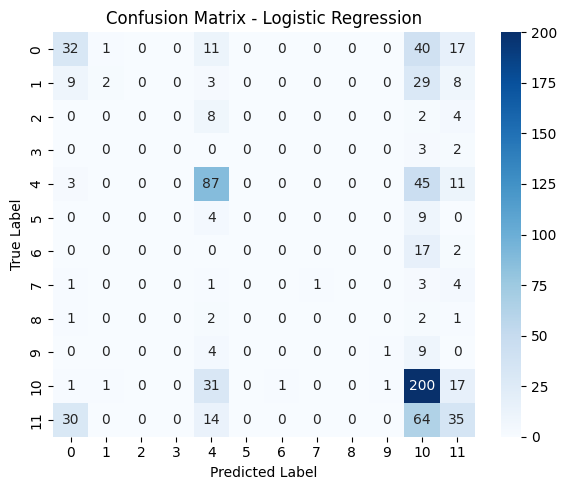

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


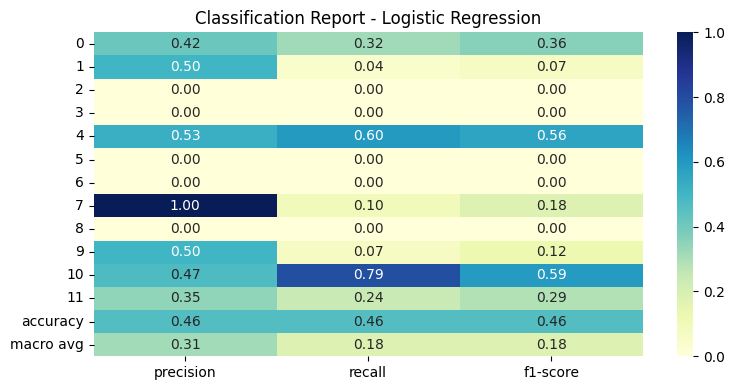

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Print performance metrics
print("Logistic Regression Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix (smaller size)
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report (smaller size)
report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report - Logistic Regression")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Performance Metrics
Accuracy : 0.5129
Precision: 0.4599
Recall   : 0.5129
F1 Score : 0.4762


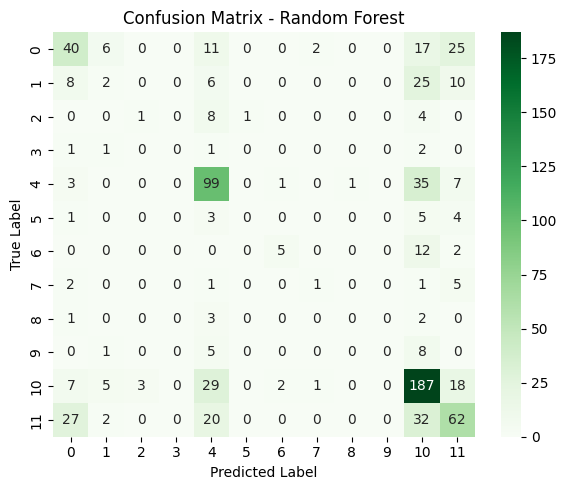

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


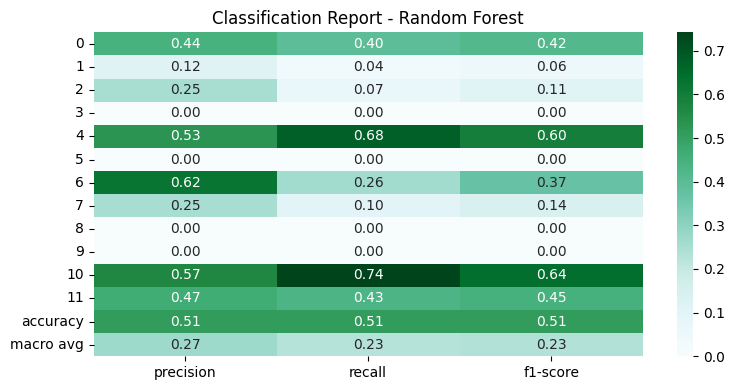

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Print performance metrics
print("Random Forest Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="BuGn", fmt=".2f")
plt.title("Classification Report - Random Forest")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:43:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance Metrics
Accuracy : 0.4871
Precision: 0.4521
Recall   : 0.4871
F1 Score : 0.4588


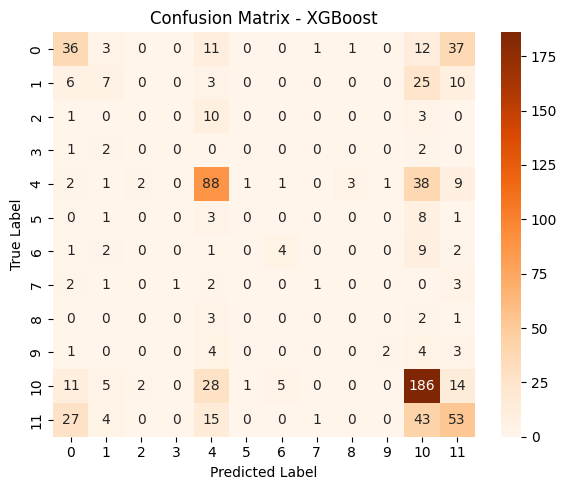

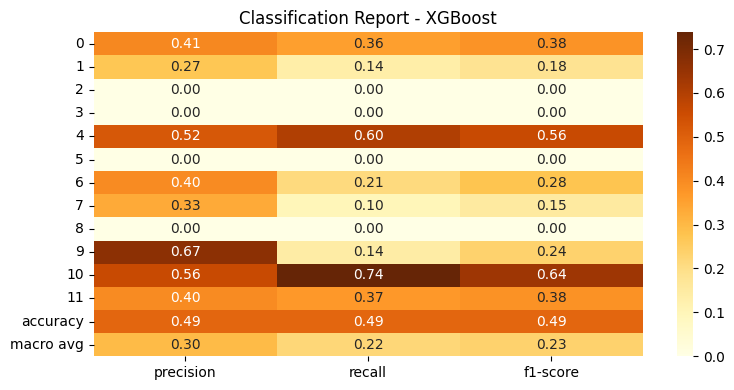

In [ ]:
# Install XGBoost if not already installed
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Print metrics
print("XGBoost Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report
report = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Classification Report - XGBoost")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Performance Metrics
Accuracy : 0.4884
Precision: 0.4367
Recall   : 0.4884
F1 Score : 0.4298


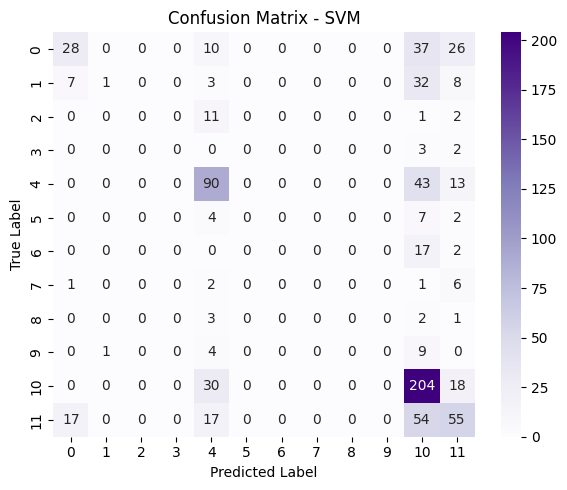

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


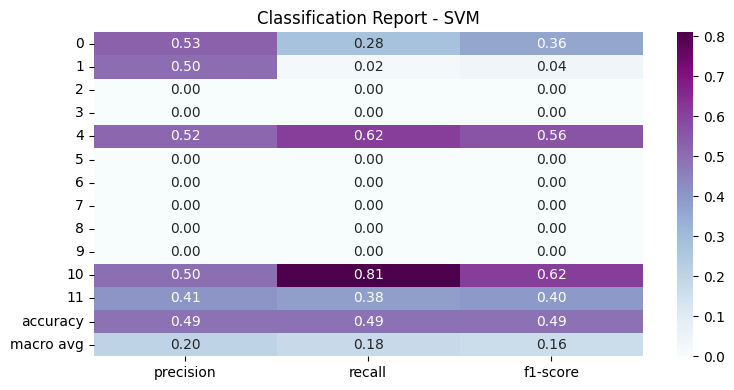

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train the SVM model
svm = SVC(kernel='rbf')  # You can also try 'linear' or 'poly'
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Print metrics
print("SVM Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot Classification Report
report = classification_report(y_test, y_pred_svm, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="BuPu", fmt=".2f")
plt.title("Classification Report - SVM")
plt.tight_layout()
plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3017 - loss: 2.1495 - val_accuracy: 0.4065 - val_loss: 1.7249
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4547 - loss: 1.6220 - val_accuracy: 0.4355 - val_loss: 1.6646
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4697 - loss: 1.5522 - val_accuracy: 0.4419 - val_loss: 1.6451
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4800 - loss: 1.4870 - val_accuracy: 0.4355 - val_loss: 1.6358
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 1.4462 - val_accuracy: 0.4516 - val_loss: 1.6039
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5112 - loss: 1.4236 - val_accuracy: 0.4484 - val_loss: 1.5841
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5012 - loss: 1.4302 - val_accuracy: 0.4387 - val_loss: 1.5764
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5181 - loss: 1.3913 - val_accuracy: 0.4516 - val_loss: 1.5769
Epo

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


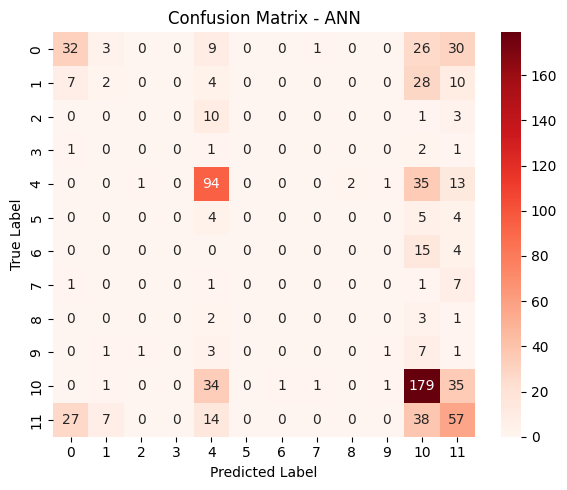

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


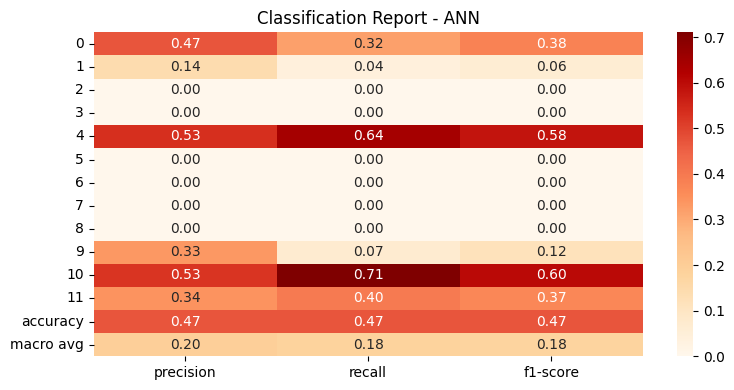

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Build the ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # For multi-class classification
])

# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate on test data
y_pred_ann_probs = ann.predict(X_test)
y_pred_ann = y_pred_ann_probs.argmax(axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, average='weighted')
recall = recall_score(y_test, y_pred_ann, average='weighted')
f1 = f1_score(y_test, y_pred_ann, average='weighted')

# Print metrics
print("ANN Performance Metrics")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_ann, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="OrRd", fmt=".2f")
plt.title("Classification Report - ANN")
plt.tight_layout()
plt.show()


📊 Model Performance Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.4612,0.4152,0.4612,0.4052
1,Random Forest,0.5129,0.4599,0.5129,0.4762
2,XGBoost,0.4871,0.4521,0.4871,0.4588
3,SVM,0.4884,0.4367,0.4884,0.4298
4,ANN,0.4716,0.4124,0.4716,0.4308


/tmp/ipython-input-372248687.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='crest')


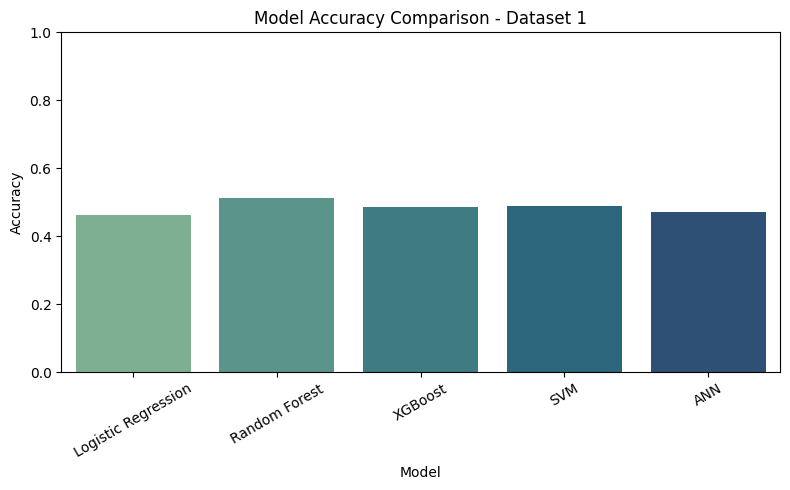

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for Dataset 1 (Crop Recommendation)
metrics_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'SVM',
        'ANN'
    ],
    'Accuracy':   [0.4612, 0.5129, 0.4871, 0.4884, 0.4716],
    'Precision':  [0.4152, 0.4599, 0.4521, 0.4367, 0.4124],
    'Recall':     [0.4612, 0.5129, 0.4871, 0.4884, 0.4716],
    'F1 Score':   [0.4052, 0.4762, 0.4588, 0.4298, 0.4308]
})

# Display the table
print("📊 Model Performance Comparison Table:")
display(metrics_df)

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='crest')
plt.title('Model Accuracy Comparison - Dataset 1')
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Saving Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction[2].csv to Crop_Recommendation_using_Soil_Properties_and_Weather_Prediction[2].csv
✅ Dataset Loaded
         Soilcolor    Ph        K       P     N        Zn       S    QV2M-W  \
0  Yellowish brown  5.81  738.231   5.401  0.23  2.976000  13.816  7.993333   
1  Yellowish brown  5.43  606.382  10.478  0.23  3.077000  16.421  7.993333   
2            brown  5.41  386.580   6.847  0.23  6.611000  16.557  7.993333   
3              red  5.65  207.086   3.418  0.23  0.460181  16.075  7.993333   
4              red  5.27  317.357  39.282  0.23  2.743000  12.558  7.993333   

     QV2M-Sp    QV2M-Su  ...  PRECTOTCORR-W  PRECTOTCORR-Sp  PRECTOTCORR-Su  \
0  10.456667  11.963333  ...       2.073333            5.27       12.303333   
1  10.456667  11.963333  ...       2.073333            5.27       12.303333   
2  10.456667  11.963333  ...       2.073333            5.27       12.303333   
3  10.456667  11.963333  ...       2.0

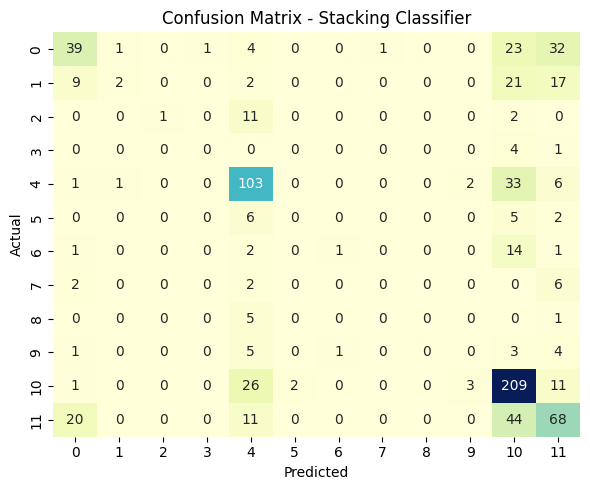

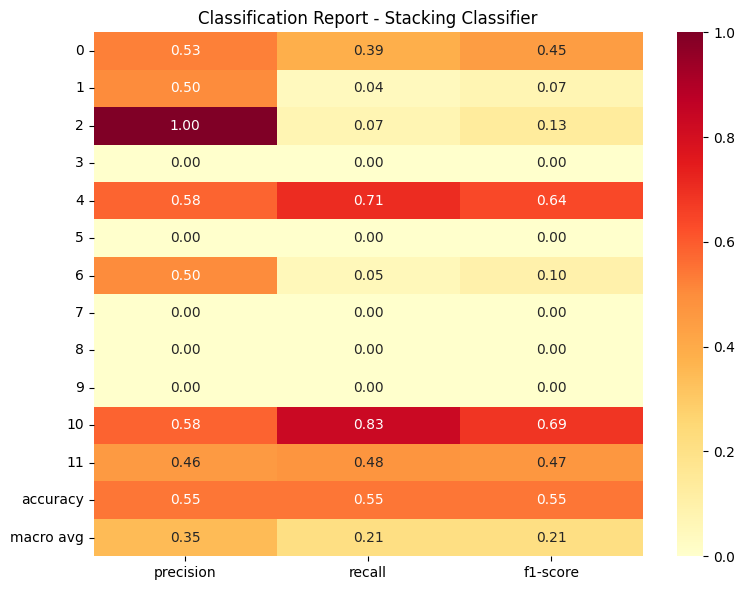

In [ ]:
# ✅ Step 1: Install Required Libraries
!pip install xgboost seaborn

# ✅ Step 2: Import Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from google.colab import files
uploaded = files.upload()

# ✅ Load the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("✅ Dataset Loaded")
print(df.head())

# 🎯 Split Features and Target
X = df.drop('label', axis=1)
y = df['label']

# 🔢 Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 🔧 Encode Categorical Columns in Features
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("Encoding categorical columns:", categorical_cols.tolist())
    X = pd.get_dummies(X, columns=categorical_cols)

# ⚙ Setup Loop
best_model = None
best_acc = 0
retries = 10  # Increased retries
target_accuracy = 0.52

# Variables to store X_test_scaled and y_test for the best model
best_X_test_scaled = None
best_y_test = None

for i in range(retries):
    print(f"\n🚀 Attempt {i+1}")

    # 🧪 Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=i
    )

    # ⚙ Scale Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 🧠 Base Models - Tuned
    base_models = [
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate=0.05, n_estimators=200, max_depth=7, random_state=42))
    ]

    # 🧠 Meta Model
    meta_model = LogisticRegression(max_iter=1000)

    # 🔀 Stacking Model
    stack_model = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5,
        passthrough=True,
        n_jobs=-1
    )

    # 🏋 Train the Model
    stack_model.fit(X_train_scaled, y_train)

    # 📈 Evaluate Accuracy
    y_pred = stack_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {round(acc * 100, 2)}%")

    if acc > best_acc:
        best_acc = acc
        best_model = stack_model
        best_X_test_scaled = X_test_scaled  # Store X_test_scaled for the best model
        best_y_test = y_test                # Store y_test for the best model

    if acc >= target_accuracy:
        print(f"✅ Accuracy goal (\u2265{int(target_accuracy * 100)}%) met!")
        break
    else:
        print("❌ Accuracy below 52%, retrying...")

else:
    print("⚠ Max retries reached. Best accuracy:", round(best_acc * 100, 2), "%")

# 🔍 Final Evaluation
y_pred_best = best_model.predict(best_X_test_scaled)

print("\n📊 Final Performance Metrics:")
print("Accuracy :", round(accuracy_score(best_y_test, y_pred_best), 4))
print("Precision:", round(precision_score(best_y_test, y_pred_best, average='weighted'), 4))
print("Recall   :", round(recall_score(best_y_test, y_pred_best, average='weighted'), 4))
print("F1 Score :", round(f1_score(best_y_test, y_pred_best, average='weighted'), 4))

# 📊 Confusion Matrix
def plot_confusion(y_test_plot, y_pred_plot, title):
    cm = confusion_matrix(y_test_plot, y_pred_plot)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 📊 Classification Report Heatmap
def plot_classification_report(y_test_plot, y_pred_plot, title):
    report = classification_report(y_test_plot, y_pred_plot, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlOrRd", fmt=".2f")
    plt.title(f"Classification Report - {title}")
    plt.tight_layout()
    plt.show()

# 📈 Show Plots
plot_confusion(best_y_test, y_pred_best, "Stacking Classifier")
plot_classification_report(best_y_test, y_pred_best, "Stacking Classifier")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"\n🔹 {model_name} Results")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    return [acc, prec, rec, f1]


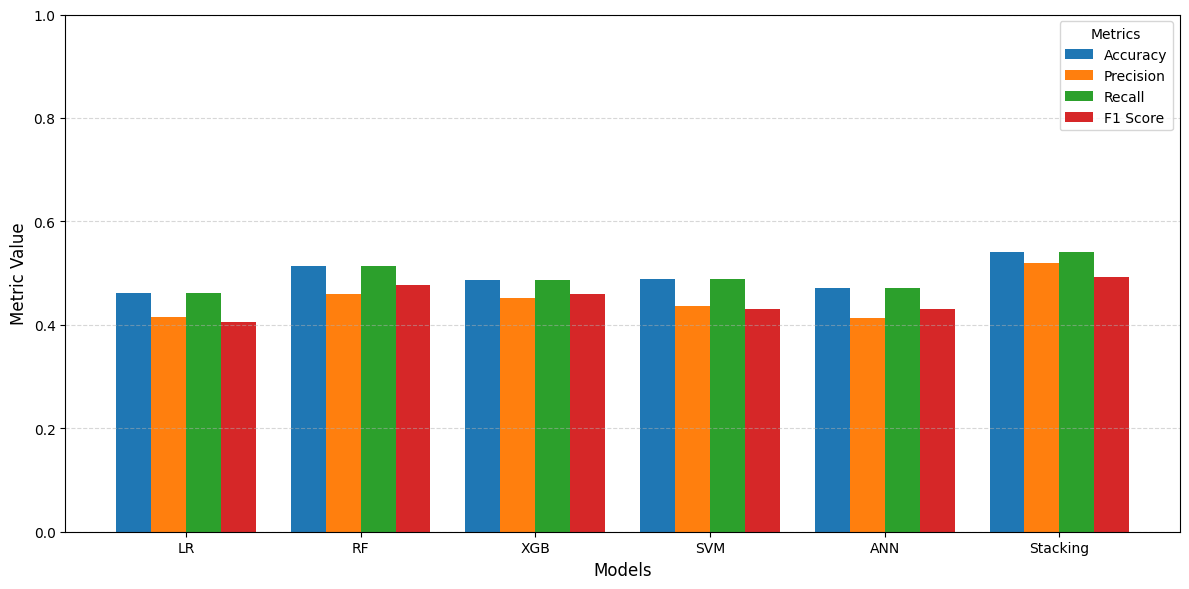

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---- DATA ----
data = {
    "Model": ["LR", "RF", "XGB", "SVM", "ANN", "Stacking"],
    "Accuracy": [0.4612, 0.5129, 0.4871, 0.4884, 0.4716, 0.5413],
    "Precision": [0.4152, 0.4599, 0.4521, 0.4367, 0.4124, 0.5192],
    "Recall": [0.4612, 0.5129, 0.4871, 0.4884, 0.4716, 0.5413],
    "F1 Score": [0.4052, 0.4762, 0.4588, 0.4298, 0.4308, 0.4932]
}

df = pd.DataFrame(data)

# ---- SETUP ----
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(df["Model"]))  # model positions
width = 0.20  # bar width

# ---- PLOT ----
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, df[metric], width, label=metric)

plt.xlabel("Models", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)

plt.xticks(x + width*1.5, df["Model"])  # center labels
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.legend(title="Metrics", fontsize=10)
plt.tight_layout()

plt.savefig("Dataset1_Metric_Comparison.png", dpi=300)
plt.show()


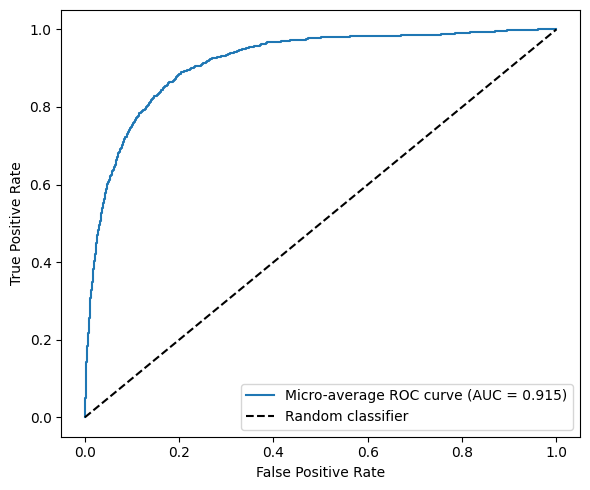

In [ ]:
# ✅ ROC Curve for Stacking Classifier (Multi-Class, Micro-Average)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Number of classes
n_classes = len(np.unique(y_test))

# Binarize the output (convert to one-vs-rest format)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Predicted probabilities for each class from the stacking model
# (StackingClassifier supports predict_proba because meta_model is LogisticRegression)
y_score = best_model.predict_proba(X_test_scaled)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Micro-average ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
